In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Exact Solution Definition**

Makeham's law is given by $\mu_x=A+Bc^x$. The closed form for ${_{t}p_{x}}$ is given by (Dickson, p.38)
 \begin{equation}
 {_{t}p_{x}}= \exp \left(-tA-\frac{Bc^{x}(c^t-1)}{\log (c)}\right).
 \end{equation}
 In general (Dickson, p.23),

In [2]:
def tpx(t, A, B, c, x):
  z1=-t*A-(B*c**x*(c**t-1))/(np.log(c))
  z2=np.exp(z1)
  return z2

# **Monte Carlo**

We apply the Monte Carlo method as described on page 8 of the paper:

_Luengo, D., Martino, L., Bugallo, M., Elvira, V., & Särkkä, S. (2020). A survey of Monte Carlo methods for parameter estimation. EURASIP Journal on Advances in Signal Processing, 2020(1), 25._

In this case, $\mu_x=A+Bc^x$, we evaluate $\int_{0}^{t} \mu_{x+s}\,ds$ using Monte Carlo integration as follows:
\begin{align}
 \int_{0}^{t} \mu_{x+s}\,ds &= \int_{0}^{t} \frac{f(s)}{f(s)} \mu_{x+s}\,ds \\
 &= \int_{0}^{t} \frac{\mu_{x+s}}{f(s)}f(s) \,ds \\
 &= \mathbb{E} \left(\frac{\mu_{x+s}}{f(s)}\right) \\
 & \approx \frac{1}{N} \sum_{i=1}^{N}\frac{\mu_{x+s_i}}{f(s_i)}
\end{align}

We assume that $s_i \sim \mathcal{U}(0,t)$. That is, $f(s)=\tfrac{1}{t}$.

In [3]:
def Mont1(t,A,B,c,N, x):
  U=np.random.uniform(0,1,N)
  Uab=0+(t-0)*U
  mu1=A+B*c**(x+Uab)
  kern=1/t
  z=np.mean(mu1/kern) #Monte Carlo Integration
  return np.exp(-z)

# **Testing Initial Code**

In [4]:
N=10000
N=10000
t0=0
t2=10
t=t2-t0
x=60
A, B, c = 0.0001, 0.00035, 1.075

print(Mont1(t,A,B,c,N, x))
print(tpx(t, A, B, c, x))

0.6749134560755898
0.6739576751262345


# **Estimating Confidence Interval**

In excel, you can use the formula =NORM.INV(1-B1/2,0,1), given that in cell B1 you have written values like 0.05, 0.01, and 0.10 etc. This calculation can give you values like 1.64, 1.96, 2.576, etc. These values are for the 90\%, 95 \% and 99 \% confidence intervals. Please get these values using Ms-Excel.

In [5]:
Zs90, Zs95, Zs99=1.64, 1.96, 2.756
Niter=300
iter=0
Vec=np.zeros(Niter)
while iter<Niter:
  Vec[iter]= Mont1(t,A,B,c,N, x)
  np.random.seed(iter) # We are Varying random paths here
  iter +=1

probability is 0.673996164461953 with 95 % CI [0.6728433408495624, 0.6751489880743435]


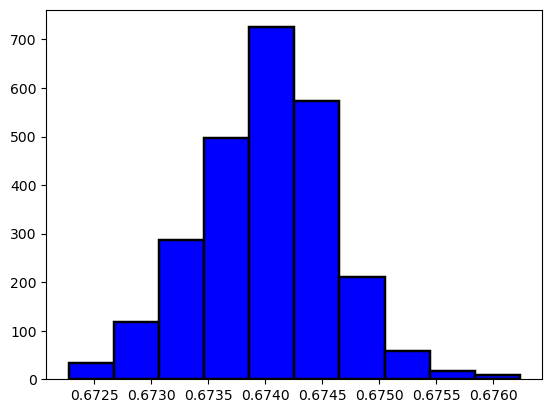

In [6]:
plt.hist(Vec, facecolor="blue", edgecolor="black", density=True,linewidth=1.79)
tpxest=np.mean(Vec)
sigma1=np.std(Vec)
CI=[tpxest-Zs95*sigma1, tpxest+Zs95*sigma1]
print(f"probability is {tpxest} with 95 % CI {CI}")

 # **Estimating Prices, assuming Minimal Noise**
This means, we will estimate both probability and price via deterministic method/ closed forms.

embedded option price under the BSM formulation is given by
 	\begin{equation}
 	\pi (0)= P \; {_{N}p_{x}}\big[e^{-rN}\Phi (-d_2)-\xi \Phi(-d_1)\big],
 	\end{equation}
 	where
 	\begin{align*}
 	d_1 &= \frac{\log (\xi)+\left(r_t+\frac{\sigma ^2}{2}\right)N}{\sigma \sqrt{N}},\\
 	d_2 &= d_1-\sigma \sqrt{N}.
 	\end{align*}


**Example:** Consider a 10-year equity-linked contract issued to a life aged
60, with a single premium of $ P $ = MK 18 million kwacha. After a deduction of 3\% for initial
expenses, the premium is invested in an equity fund. An annual management 
charge of 0.5\% is deducted from the fund at the start of every year except the first.
 
 
1) The contract carries a guarantee that the maturity benefit will not be less than
	the single premium, $ P $.
2) The risk free rate of interest is 5\% per year, continuously compounded, and
	stock price volatility is 25\% per year.

In [7]:
def PhiEst(x):
    zx=2**(-22**(1-41**(x/10)))
    return zx 
def Ds(Xi, rt, sigma2, N):
    d1=(np.log(Xi)+(rt+sigma2**2/2)*N)/(sigma2*np.sqrt(N))
    d2=d1-sigma2*np.sqrt(N)
    return d1, d2

In [8]:
e=3/100
m=0.5/100
Nt2=10
Xi=(1-e)*(1-m)**(Nt2-1)
rt=5/100
sigma2=25/100
P=1
d1, d2= Ds(Xi, rt, sigma2, Nt2)
print(Xi)
print(d1, d2)
print(tpx(t, A, B, c, x))
Price=P*tpx(t, A, B, c, x)*(np.exp(-rt*Nt2)*PhiEst(-d2)-Xi*PhiEst(-d1))
print(Price)

print(f"Hence, the price is {np.round(Price*100, 1)} % of n.s.p")




0.9272128910068328
0.9321482744992786 0.14157885945718374
0.6739576751262345
0.06872895705152361
Hence, the price is 6.9 % of n.s.p


# **Monte Carlo Method**

The basic mean value Monte Carlo method simply says that $ \displaystyle  \mathbb{E} (g(w)) \approx \frac{\sum _{i=1}^{M}g(s_i)}{M}$. You remember that the strong law of large numbers says that $\mathbb{P} \left( \displaystyle \mathbb{E} (g(w)) = \lim_{M\to \infty} \frac{\sum _{i=1}^{M}g(s_i)}{M}\right)=1$. I request leader to understand what is being meant here. Read chapter 11 of the book ``Introduction to Probability Models'' by Sheldon Ross (2009) for more details.

In our case we assume that $S_N$ follows a lognormal distribution. This means, we can simulate $S_N$ by the following Geometric Brownian Motion (GBM):
\begin{equation}
S_N=S_t \exp \left[ \left(r-\frac{\sigma^2}{2} \right)(N-n)+ \sigma \sqrt{N-n} N(0,1)\ \right]
\end{equation}
Thus, we can then apply Monte Carlo method as follows: $$\pi (0)=P \; \xi \; {_{N}p_{x}} \; \mathbb{E}^{\mathbb{Q}} \!\left(e^{-rN}(\xi^{-1}-S_{N})^{+}\right) \approx P \; \xi \; {_{N}p_{x}} \;    \frac{\sum _{i=1}^{M} \!\left(e^{-rN}(\xi^{-1}-S_{N_i})^{+}\right)}{M}$$

In [9]:
St=1
nt=0
N01=np.random.randn(N)
#print(np.mean(N01), np.std(N01))
SN=St*np.exp((rt-sigma2**2/2)*(Nt2-nt)+sigma2*np.sqrt(Nt2-nt)*N01)
hn=np.maximum(1/Xi-SN,0)
print(hn)
Pricemont=P*Xi*tpx(t, A, B, c, x)*np.mean( np.exp(-rt*Nt2)*hn)
print(Pricemont)

[0.36807648 0.76625751 0.         ... 0.46181344 0.58317691 0.        ]
0.07077004119270097


In [10]:
Niter2=300
iter2=0
Vec2=np.zeros(Niter2)
while iter2<Niter2:
    N01=np.random.randn(N)
    SN=St*np.exp((rt-sigma2**2/2)*(Nt2-nt)+sigma2*np.sqrt(Nt2-nt)*N01)
    hn=np.maximum(1/Xi-SN,0)
    Pricemont=P*Xi*tpx(t, A, B, c, x)*np.mean( np.exp(-rt*Nt2)*hn)
    Vec2[iter2]=Pricemont
    iter2 +=1

Costs at issue are 0.07167646424370643 with 95 % CI [0.06980349238655521, 0.07354943610085764]


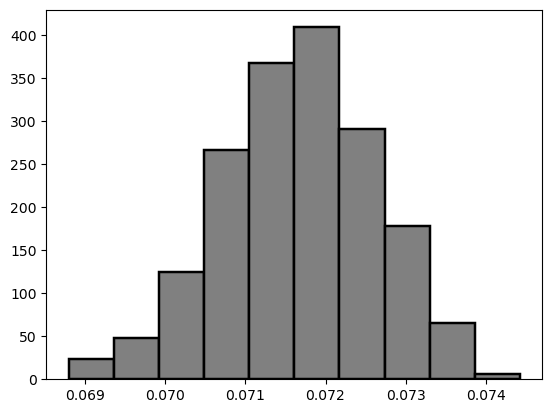

In [11]:
plt.hist(Vec2, facecolor="grey", edgecolor="black", density=True,linewidth=1.79)
cest=np.mean(Vec2)
sigma3=np.std(Vec2)
CI2=[cest-Zs95*sigma3, cest+Zs95*sigma3]
print(f"Costs at issue are {cest} with 95 % CI {CI2}")

 # **Incorporation of Policy Lapses**

Now suppose that, allowing for mortality and lapses, the insurer expects only $55\%$ of policyholders to maintain their policies to maturity.\\

\noindent We propose using the formula: 
$$\pi (0)=P \; \xi \; (1-Q) \; \mathbb{E}^{\mathbb{Q}} \!\left(e^{-rN}(\xi^{-1}-S_{N})^{+}\right) \approx P \; \xi \; (1-Q) \; \frac{\sum _{i=1}^{M} \!\left(e^{-rN}(\xi^{-1}-S_{N_i})^{+}\right)}{M}$$

That is, we assume that ${_{N}p_{x}}=1-Q$, where $Q$ is the probability of surrender. That is, $Q=1-0.55=0.45$. We are not precise, but we think that putting $(1-Q){_{N}p_{x}}$ can lead to mispricing of the option. That is, if the insurer has surrendered then he might have survived.

In [12]:
Q=45/100
Niter3=300
iter3=0
Vec3=np.zeros(Niter3)
while iter3<Niter3:
    N01=np.random.randn(N)
    SN=St*np.exp((rt-sigma2**2/2)*(Nt2-nt)+sigma2*np.sqrt(Nt2-nt)*N01)
    hn=np.maximum(1/Xi-SN,0)
    Pricemont=P*Xi*(1-Q)*np.mean( np.exp(-rt*Nt2)*hn)
    Vec3[iter3]=Pricemont
    iter3 +=1

Costs at issue are 0.058401123536839954 with 95 % CI [0.056733057864779404, 0.0600691892089005]


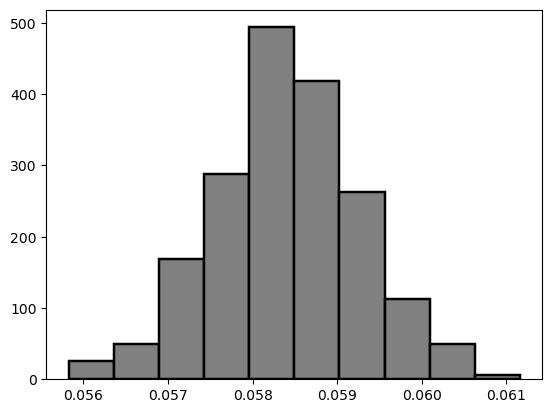

In [13]:
plt.hist(Vec3, facecolor="grey", edgecolor="black", density=True,linewidth=1.79)
cest3=np.mean(Vec3)
sigma4=np.std(Vec3)
CI3=[cest3-Zs95*sigma4, cest3+Zs95*sigma4]
print(f"Costs at issue are {cest3} with 95 % CI {CI3}")